# ДЗ 1. Основы обучения нейронных сетей

## Параметры двухслойной нейронной сети

Используя файл Web1.ipynb (он в полезных ссылках):  

- Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность.  
- Проведите анализ — что приводит к ухудшению точности нейронной сети?  
- Что приводит к увеличению ее точности?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler

(1797, 64)


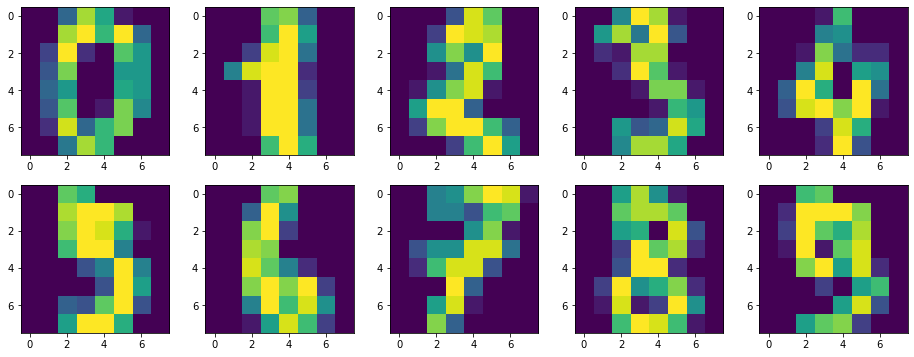

In [2]:
# Подготовка тренировочных данных
X, y = load_digits(return_X_y=True)
print(X.shape) # расскоментируйте, чтобы увидеть размер данных

# репрезентация данных
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8, 8]))

In [3]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
def to_one_hot(Y):
    n_col = np.max(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1
    return binarized

# вычисление сигмоид функции
def sigmoid(x):
    x = np.clip(x, a_min=-500, a_max=500)
    return 1 / (1 + np.exp(-x))

# вычисление производной от сигмоид функции
def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [6]:
# формирование входных данных
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# формирование выходных данных(результатов)
y = y.flatten()
y = to_one_hot(y)
display(y, y.shape)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

(1797, 10)

In [7]:
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train.shape, X_test.shape

((1203, 64), (594, 64))

In [8]:
# Обучение нейронной сети

# определим число нейронов скрытого слоя
neuron_numb = 5

# присваивание случайных весов
np.random.seed(1)
w0 = np.random.random((64, neuron_numb))  # для входного слоя    - 64 входа, neuron_numb выходов
w1 = np.random.random((neuron_numb, 10))  # для внутреннего слоя - neuron_numb входов, 10 выходов

# скорость обучения (learning rate)
learning_rate = 0.1

# количество итераций
num_epochs = 100

# массив для ошибок, чтобы потом построить график
errors = []
metrics = []

# процесс обучения
for i in range(num_epochs):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение (back propagation)
    #  с использованием градиентного спуска
    layer2_error = layer2 - y_train  # производная функции потерь
    layer2_grad = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_grad.dot(w1.T)
    layer1_grad = layer1_error * sigmoid_deriv(layer1)
    
    w1 -= layer1.T.dot(layer2_grad) * learning_rate
    w0 -= layer0.T.dot(layer1_grad) * learning_rate
    
    # ошибка модели
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    
    # метрики качества
    preds = np.argmax(layer2, axis=1)
    labels = np.argmax(y_train, axis=1)
    accuracy = (preds == labels).sum() * 100 / len(labels)
    metrics.append(accuracy)

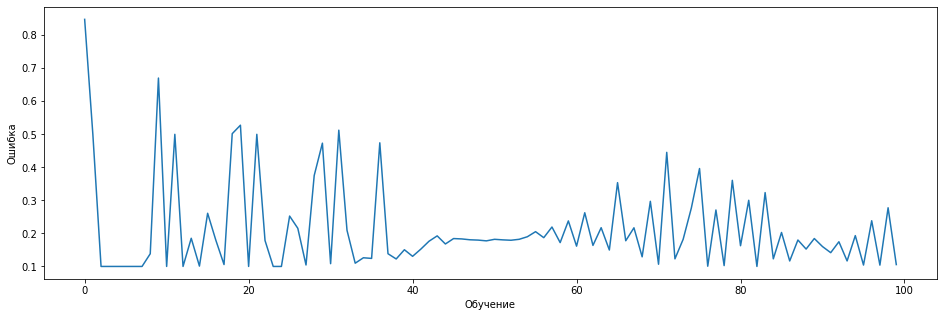

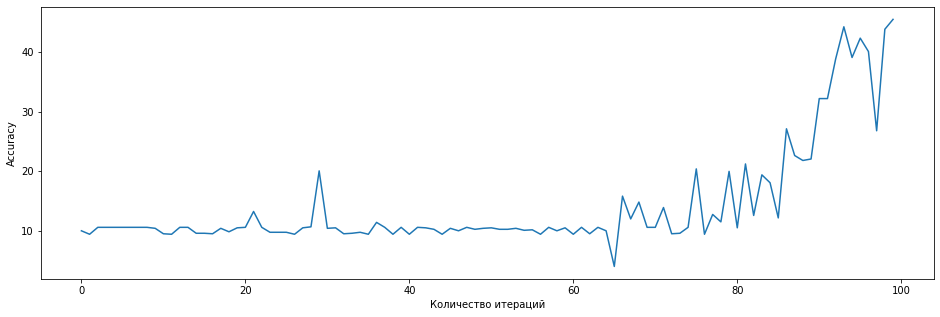

In [9]:
# Демонстрация полученных результатов
# Диаграмма точности в зависимости от обучения
plt.figure(figsize=(16, 5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(metrics)
plt.xlabel('Количество итераций')
plt.ylabel('Accuracy')
plt.show()

In [10]:
y_train[:10]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

---

## Проведем эксперимент

**1. Увеличим число нейронов скрытого слоя не изменяя другие параметры**


В эксперементе на скрытом слое нейронов: 5


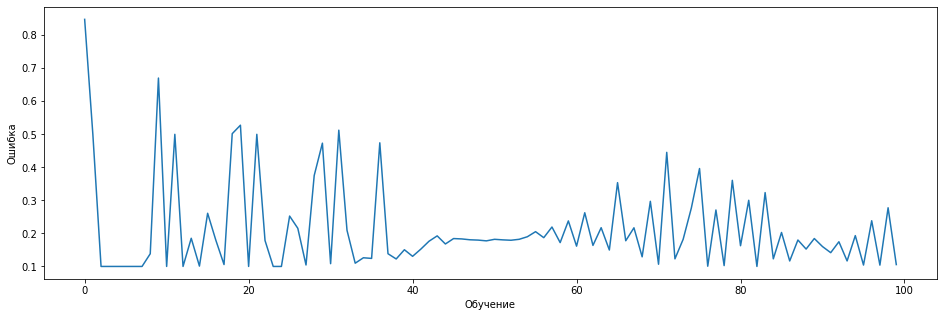

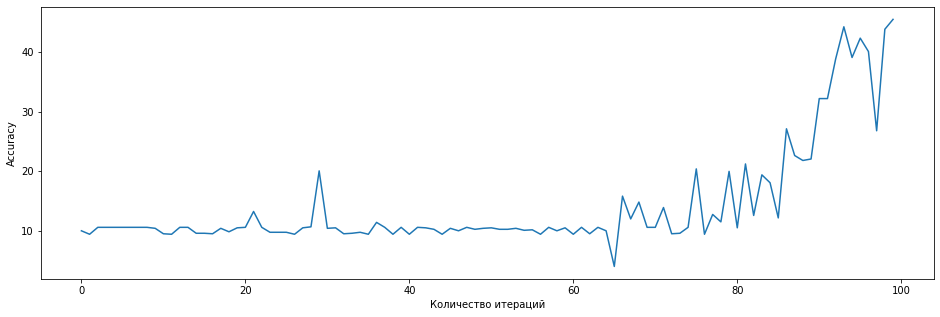


В эксперементе на скрытом слое нейронов: 10


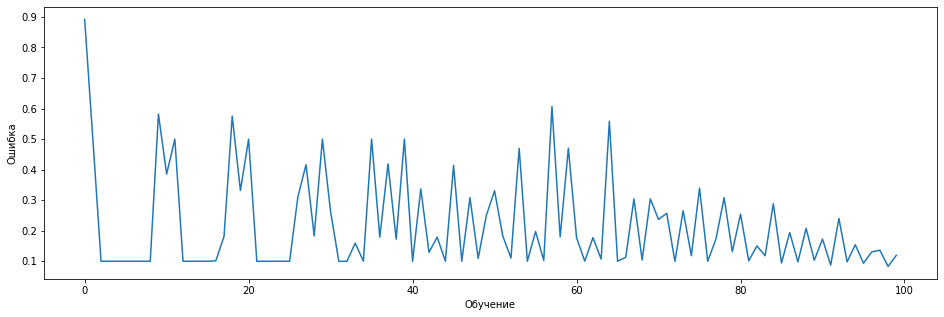

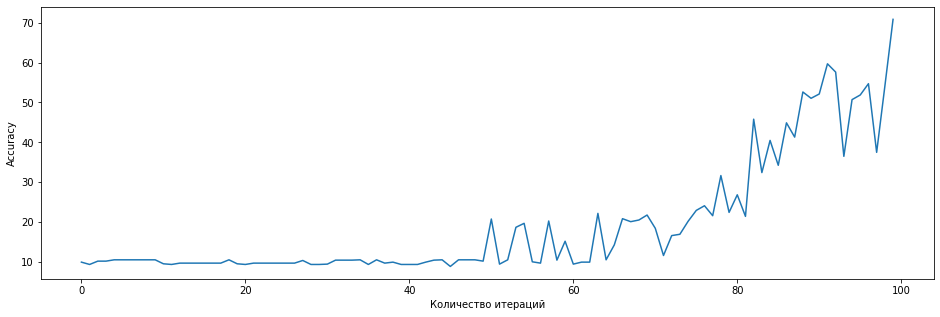


В эксперементе на скрытом слое нейронов: 20


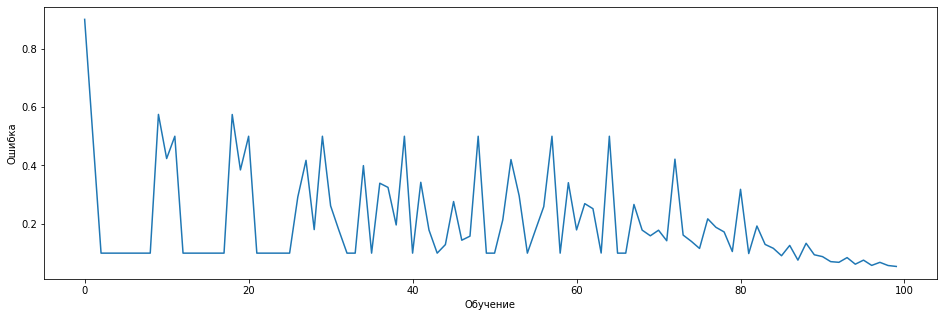

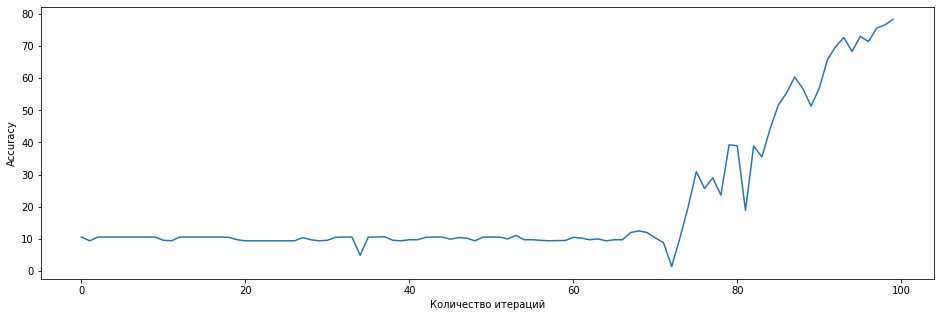


В эксперементе на скрытом слое нейронов: 50


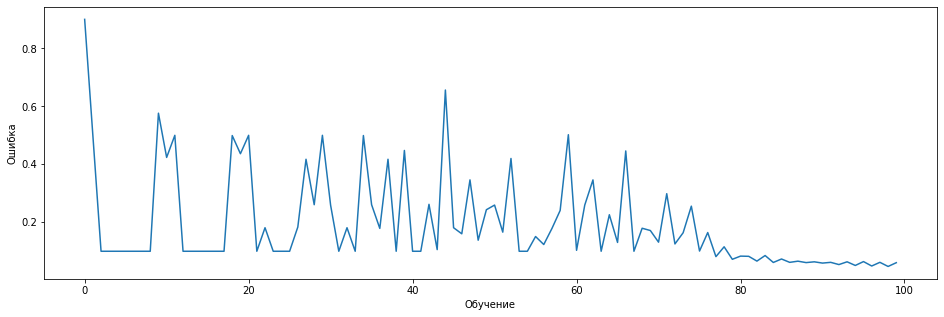

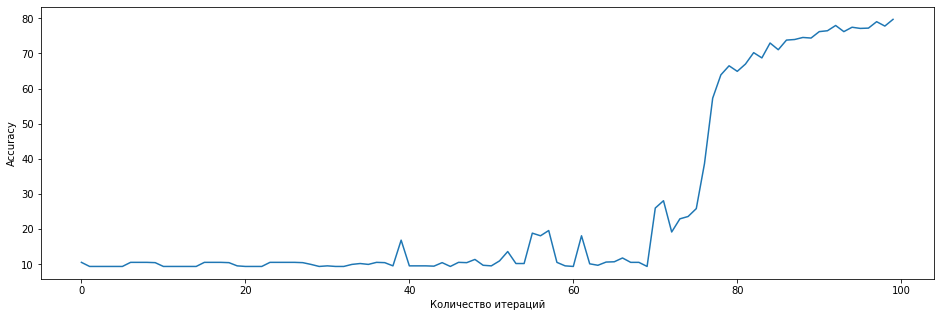

In [16]:
# Обучение нейронной сети

# определим число нейронов скрытого слоя
neuron_numb_list = [5,10,20,50] ####### ----- ИЗМЕНЕНО !!!

for neuron_numb in neuron_numb_list: ####### ----- ИЗМЕНЕНО !!!
    
    # присваивание случайных весов
    np.random.seed(1)
    w0 = np.random.random((64, neuron_numb))  # для входного слоя    - 64 входа, neuron_numb выходов
    w1 = np.random.random((neuron_numb, 10))  # для внутреннего слоя - neuron_numb входов, 10 выходов

    # скорость обучения (learning rate)
    learning_rate = 0.1

    # количество итераций
    num_epochs = 100

    # массив для ошибок, чтобы потом построить график
    errors = []
    metrics = []

    # процесс обучения
    for i in range(num_epochs):

        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение (back propagation)
        #  с использованием градиентного спуска
        layer2_error = layer2 - y_train  # производная функции потерь
        layer2_grad = layer2_error * sigmoid_deriv(layer2)

        layer1_error = layer2_grad.dot(w1.T)
        layer1_grad = layer1_error * sigmoid_deriv(layer1)

        w1 -= layer1.T.dot(layer2_grad) * learning_rate
        w0 -= layer0.T.dot(layer1_grad) * learning_rate

        # ошибка модели
        error = np.mean(np.abs(layer2_error))
        errors.append(error)

        # метрики качества
        preds = np.argmax(layer2, axis=1)
        labels = np.argmax(y_train, axis=1)
        accuracy = (preds == labels).sum() * 100 / len(labels)
        metrics.append(accuracy)
        
    # Демонстрация полученных результатов ####### ----- ДОБАВЛЕНО В ЦИКЛ !!!
    # Диаграмма точности в зависимости от обучения
    print('\nВ эксперементе на скрытом слое нейронов:', neuron_numb) ####### ----- ДОБАВЛЕНО В ЦИКЛ !!!
    plt.figure(figsize=(16, 5))
    plt.plot(errors)
    plt.xlabel('Обучение')
    plt.ylabel('Ошибка')
    plt.show()

    plt.figure(figsize=(16, 5))
    plt.plot(metrics)
    plt.xlabel('Количество итераций')
    plt.ylabel('Accuracy')
    plt.show()

**Вывод:** при увеличении числа нейронов качество обучения сети возрастает.

**2. Изменим скорость обучения не изменяя другие параметры**


В эксперементе скорость обучения равна: 0.01


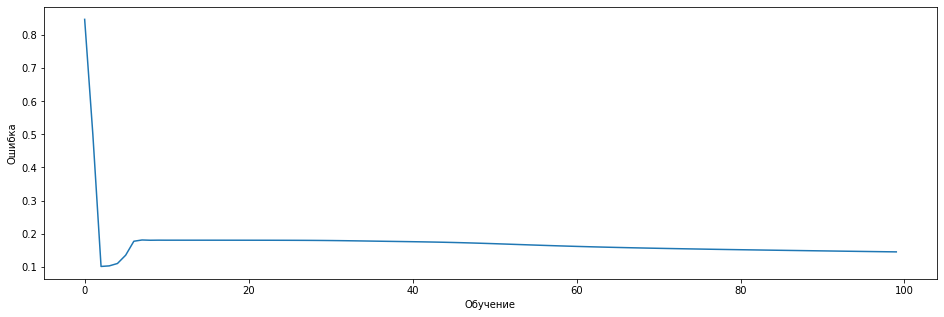

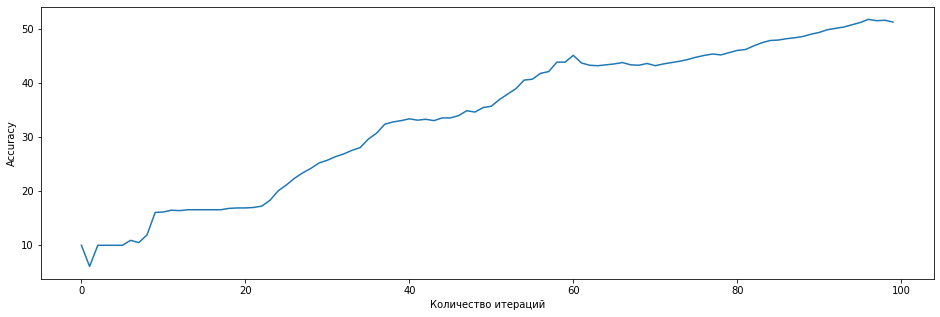


В эксперементе скорость обучения равна: 0.1


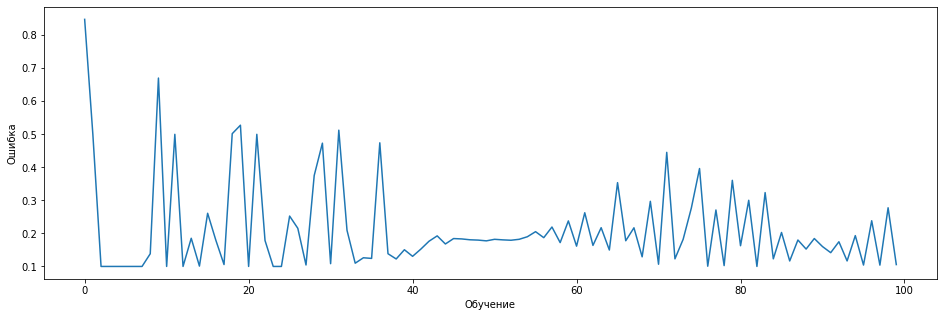

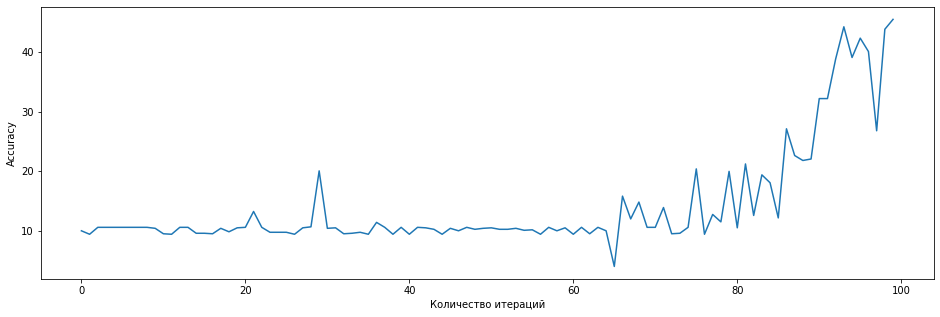


В эксперементе скорость обучения равна: 0.5


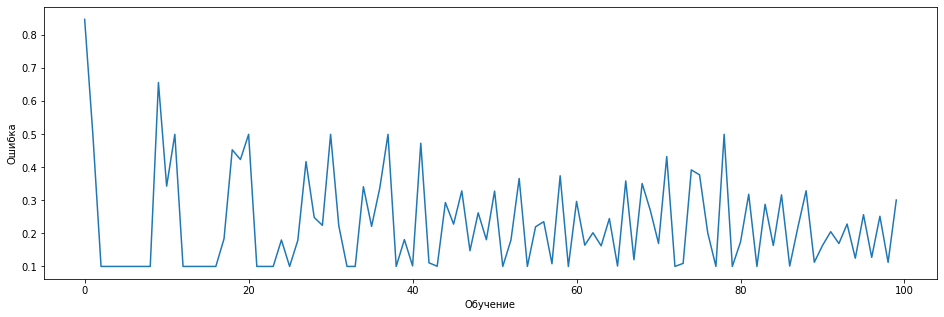

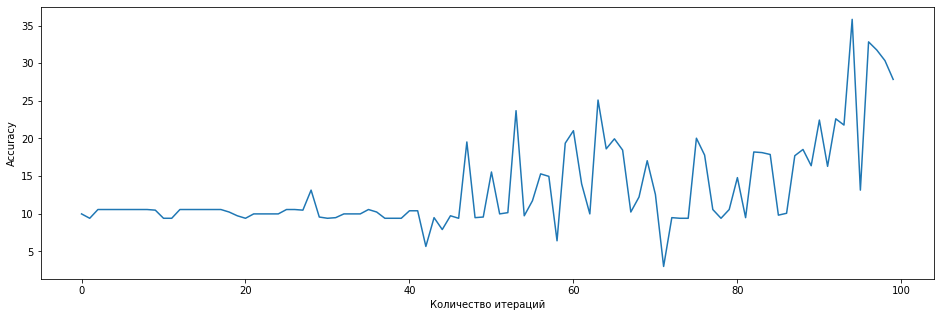

In [19]:
# Обучение нейронной сети

# определим число нейронов скрытого слоя
neuron_numb = 5

# скорость обучения (learning rate) ####### ----- ИЗМЕНЕНО !!!
learning_rate_list = [0.01, 0.1, 0.5]

for learning_rate in learning_rate_list: ####### ----- ИЗМЕНЕНО !!!
    
    # присваивание случайных весов
    np.random.seed(1)
    w0 = np.random.random((64, neuron_numb))  # для входного слоя    - 64 входа, neuron_numb выходов
    w1 = np.random.random((neuron_numb, 10))  # для внутреннего слоя - neuron_numb входов, 10 выходов

    # скорость обучения (learning rate)
    # learning_rate = 0.1 ####### ----- ИЗМЕНЕНО !!!

    # количество итераций
    num_epochs = 100

    # массив для ошибок, чтобы потом построить график
    errors = []
    metrics = []

    # процесс обучения
    for i in range(num_epochs):

        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение (back propagation)
        #  с использованием градиентного спуска
        layer2_error = layer2 - y_train  # производная функции потерь
        layer2_grad = layer2_error * sigmoid_deriv(layer2)

        layer1_error = layer2_grad.dot(w1.T)
        layer1_grad = layer1_error * sigmoid_deriv(layer1)

        w1 -= layer1.T.dot(layer2_grad) * learning_rate
        w0 -= layer0.T.dot(layer1_grad) * learning_rate

        # ошибка модели
        error = np.mean(np.abs(layer2_error))
        errors.append(error)

        # метрики качества
        preds = np.argmax(layer2, axis=1)
        labels = np.argmax(y_train, axis=1)
        accuracy = (preds == labels).sum() * 100 / len(labels)
        metrics.append(accuracy)
        
    # Демонстрация полученных результатов ####### ----- ДОБАВЛЕНО В ЦИКЛ !!!
    # Диаграмма точности в зависимости от обучения
    print('\nВ эксперементе скорость обучения равна:', learning_rate) ####### ----- ДОБАВЛЕНО В ЦИКЛ !!!
    plt.figure(figsize=(16, 5))
    plt.plot(errors)
    plt.xlabel('Обучение')
    plt.ylabel('Ошибка')
    plt.show()

    plt.figure(figsize=(16, 5))
    plt.plot(metrics)
    plt.xlabel('Количество итераций')
    plt.ylabel('Accuracy')
    plt.show()

**Вывод:** при увеличении скорости обучения качество ухудшается.

**3. Изменим количество итераций не изменяя другие параметры**


В эксперементе количество итераций равно: 50


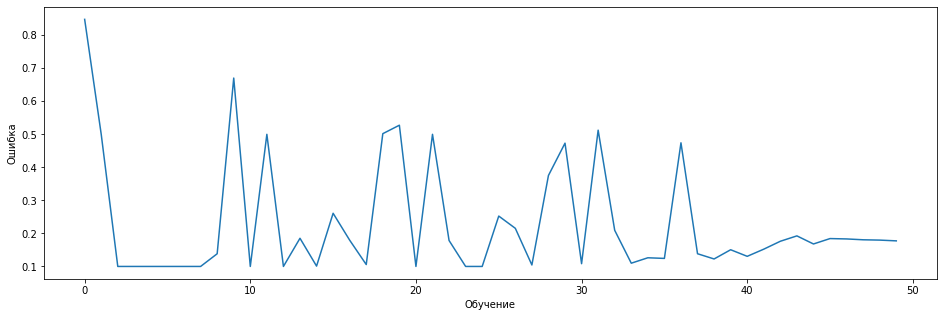

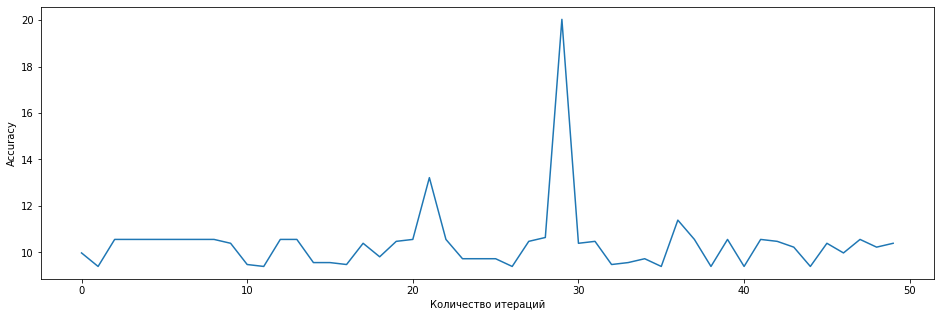


В эксперементе количество итераций равно: 100


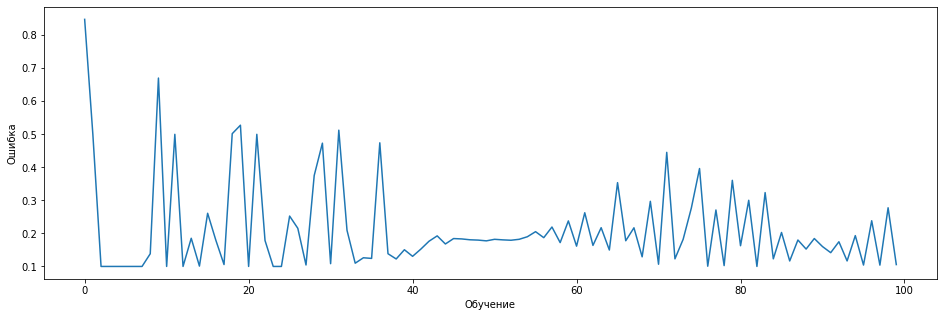

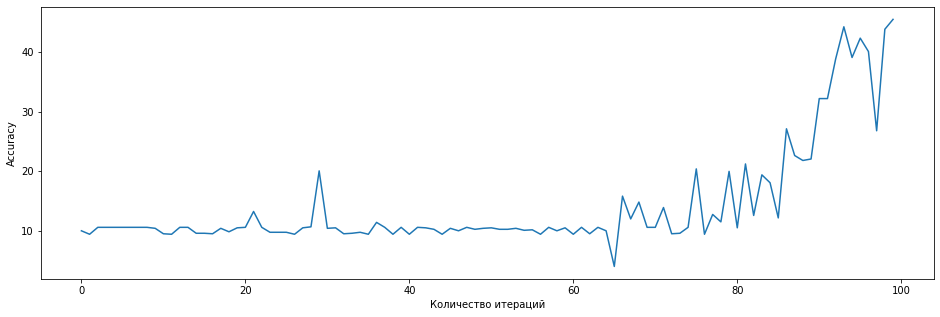


В эксперементе количество итераций равно: 150


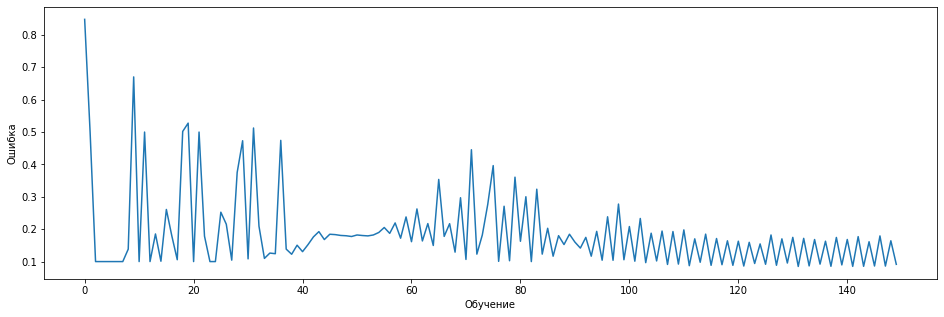

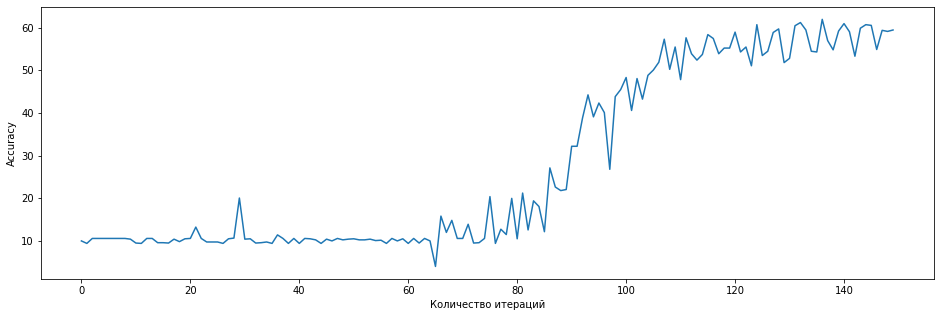

In [24]:
# Обучение нейронной сети

# определим число нейронов скрытого слоя
neuron_numb = 5

# количество итераций ####### ----- ИЗМЕНЕНО !!!
num_epochs_list = [50,100,150]

for num_epochs in num_epochs_list: ####### ----- ИЗМЕНЕНО !!!
    
    # присваивание случайных весов
    np.random.seed(1)
    w0 = np.random.random((64, neuron_numb))  # для входного слоя    - 64 входа, neuron_numb выходов
    w1 = np.random.random((neuron_numb, 10))  # для внутреннего слоя - neuron_numb входов, 10 выходов

    # скорость обучения (learning rate)
    learning_rate = 0.1

    # количество итераций
    # num_epochs = 100 ####### ----- ИЗМЕНЕНО !!!

    # массив для ошибок, чтобы потом построить график
    errors = []
    metrics = []

    # процесс обучения
    for i in range(num_epochs):

        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение (back propagation)
        #  с использованием градиентного спуска
        layer2_error = layer2 - y_train  # производная функции потерь
        layer2_grad = layer2_error * sigmoid_deriv(layer2)

        layer1_error = layer2_grad.dot(w1.T)
        layer1_grad = layer1_error * sigmoid_deriv(layer1)

        w1 -= layer1.T.dot(layer2_grad) * learning_rate
        w0 -= layer0.T.dot(layer1_grad) * learning_rate

        # ошибка модели
        error = np.mean(np.abs(layer2_error))
        errors.append(error)

        # метрики качества
        preds = np.argmax(layer2, axis=1)
        labels = np.argmax(y_train, axis=1)
        accuracy = (preds == labels).sum() * 100 / len(labels)
        metrics.append(accuracy)
        
    # Демонстрация полученных результатов ####### ----- ДОБАВЛЕНО В ЦИКЛ !!!
    # Диаграмма точности в зависимости от обучения
    print('\nВ эксперементе количество итераций равно:', num_epochs) ####### ----- ДОБАВЛЕНО В ЦИКЛ !!!
    plt.figure(figsize=(16, 5))
    plt.plot(errors)
    plt.xlabel('Обучение')
    plt.ylabel('Ошибка')
    plt.show()

    plt.figure(figsize=(16, 5))
    plt.plot(metrics)
    plt.xlabel('Количество итераций')
    plt.ylabel('Accuracy')
    plt.show()

**Вывод** с увеличением количества итераций качество улучшается.